**Course**: Qubits, entanglement and matrix product sates

**Author**: Théo HUET

**Date**: 16/01/2026-18/01/2026

# TD1 - One, two and many qubits: Density matrices, purity and entanglement

## Exercice 1 : Time evolution of entanglement

We consider a system of two interacting qubits in the state :

$|\Psi > = |01>$

The Hamiltonian is given by:

$ H = - J \sigma_x \otimes \sigma_x + \frac{\pi}{4} \sigma_y \otimes Id + \frac{1}{2} Id \otimes \sigma_z $

We study the unitary dynamics of a two-qubit system
and analyze the generation of entanglement.

### Initialisation :

In [44]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import constants

import importlib
importlib.reload(constants)

# Physical parameters
J = 1.0

# Hamiltonian
H = -J*np.kron(constants.X,constants.X) + np.pi/4 * np.kron(constants.Y,constants.I) + 0.5 * np.kron(constants.I,constants.Z)

def compute_U(H: np.ndarray) : # evolution operator
  return expm(1j*H*constants.dt)

# initial state
va = np.array([0,1]) #|0>
vb = np.array([0,1]) #|1>
psi0 = np.kron(va,vb) #|01>
rho0 = np.outer(psi0,np.conjugate(psi0)) #|01><01|
# or   np.kron(psi0.conjugate(psi0)).reshape(4,4)


### Discretized temporary evolution loop :

In [45]:
def evolution_loop(H : np.array, Nt : int) :
  # initialization of lists for measurements
  purity, entropy_A, averageEnergy = [], [], []
  U = compute_U(H)
  Ud = np.conj(np.transpose(U)) #U dagger

  rho = rho0
  for _ in range(Nt) :
    # Unitary time evolution of the density matrix
    rho = U @ rho @ Ud

    # average energy calculation (to verify that it is conserved and that our simulation is stable)
    averageEnergy.append(np.trace(H @ rho))

    # entropy calculation
    rho_A = rho[0:2,0:2] + rho[2:4,2:4] # partial trace of rho(t)
    eigenValues = np.abs(np.linalg.eigvals(rho_A)) + constants.epsilon  # with epsilon = 1e-8, this avoids numerical instability issues
    S = -np.sum(eigenValues * np.log(eigenValues))
    entropy_A.append(S)

    # purity calculation
    purity.append(np.trace(rho_A @ rho_A))
  return purity, entropy_A, averageEnergy

purity, entropy_A, averageEnergy = evolution_loop(H, constants.Nt)

### Plot :

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


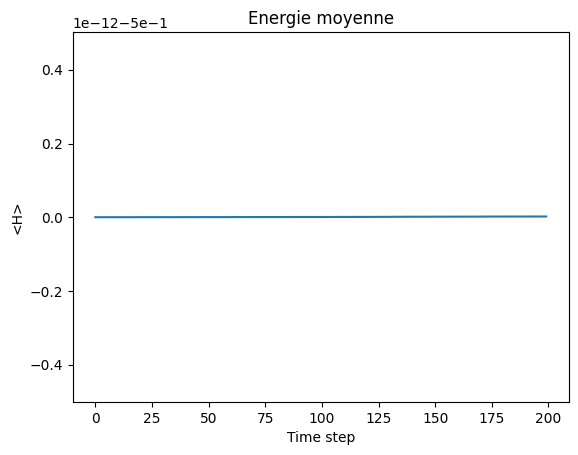

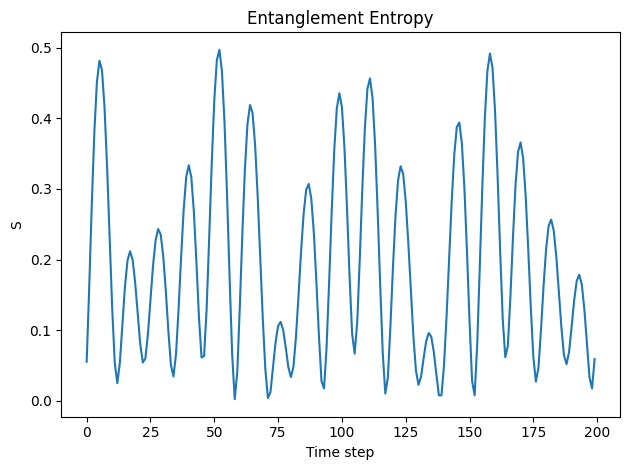

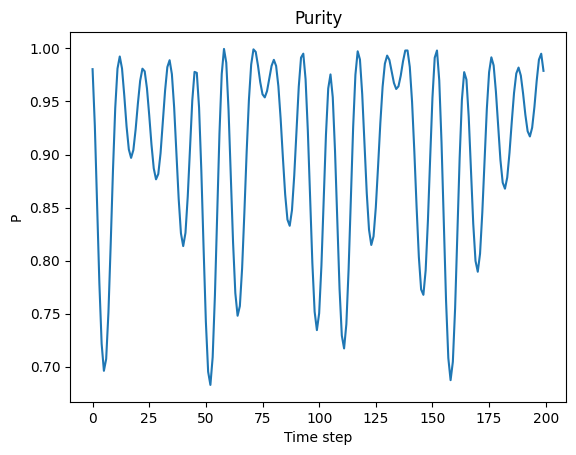

In [46]:
def plot_results(show_plot=False) :
  # energy conservation figure
  plt.figure()
  plt.plot(averageEnergy)
  plt.xlabel("Time step")
  plt.ylabel("<H>")
  plt.title("Energie moyenne")
  if show_plot :
    plt.show()

  # entropy figure
  plt.figure()
  plt.plot(entropy_A)
  plt.title("Entanglement Entropy")
  plt.xlabel("Time step")
  plt.ylabel("S")
  plt.tight_layout()
  if show_plot :
    plt.show()

  # purity figure
  plt.figure()
  plt.title("Purity")
  plt.xlabel("Time step")
  plt.ylabel("P")
  plt.plot(purity)
  if show_plot :
    plt.show()

plot_results(show_plot=True)

The entanglement entropy exhibits strong temporal oscillations,
which are characteristic of unitary dynamics in a finite quantum system.

Due to the highly oscillatory behavior of the observables,
we also compute their time-averaged values defined as:

$\overline{f}(T) = \frac{1}{T} \int_0^T f(t)\, dt$

### Time averaged values as function of T :

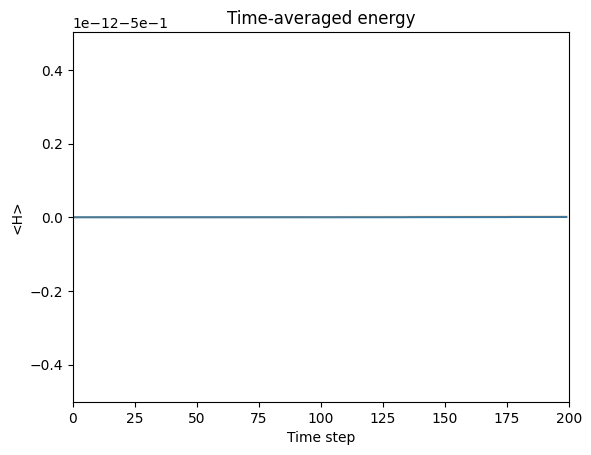

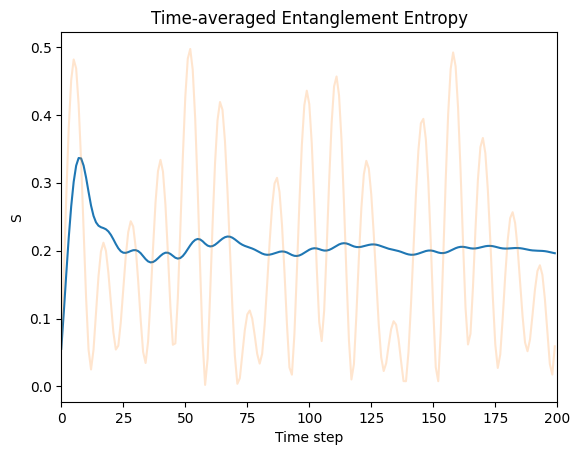

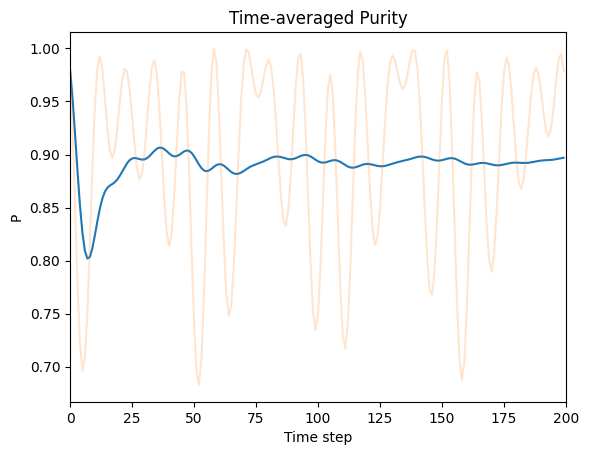

In [ ]:
# initialization of lists for measurements
averageEnergy_T, entropy_A_T, purity_T = [], [], []

time = np.arange(len(averageEnergy)) * constants.dt

for n in range(1, len(averageEnergy) + 1):
    averageEnergy_T.append(np.mean(averageEnergy[:n]))
    entropy_A_T.append(np.mean(entropy_A[:n]))
    purity_T.append(np.mean(purity[:n]))

# Time-averaged energy conservation figure
plt.figure()
plt.plot(averageEnergy_T)
plt.plot(averageEnergy, alpha=0.2)
plt.xlabel("Time step")
plt.ylabel("<H>")
plt.title("Time-averaged energy")
plt.xlim(0,constants.Nt)
plt.show()

# Time-averaged entropy figure
plt.figure()
plt.plot(entropy_A_T)
plt.plot(entropy_A,alpha=0.2)
plt.xlabel("Time step")
plt.ylabel("S")
plt.title("Time-averaged Entanglement Entropy")
plt.xlim(0,constants.Nt)
plt.show()

#Time-averaged purity figure
plt.figure()
plt.plot(purity_T)
plt.plot(purity, alpha=0.2)
plt.xlabel("Time step")
plt.ylabel("P")
plt.title("Time-averaged Purity")
plt.xlim(0,constants.Nt)
plt.show()



The time-averaged observables display a much smoother behavior
and tend towards stationary values.
This averaging allows us to extract the long-time properties of the system.

To further our analysis, we now extend the simulation to a range of coupling strengths $J$. By comparing these different regimes, we can observe how the interaction strength dictates the speed of decoherence and the stabilization levels of our observables. The following animation illustrates this transition across multiple values of $J$.

## A range of coupling strengths $J$ :


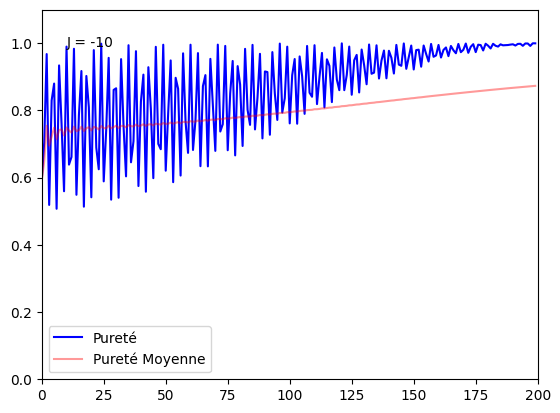

In [ ]:
from matplotlib.animation import FuncAnimation

# Listes pour stocker TOUTES les données de chaque J
all_purity = []
all_purity_T = []
all_averageEnergy = []
all_averageEnergy_T = []
all_entropy_A = []
all_entropy_A_T = []

all_J_values = np.arange(-10, 10, 1)
for J in all_J_values :
  # Hamiltonian
  H = -J*np.kron(X,X) + np.pi/4 * np.kron(Y,I) + 0.5 * np.kron(I,Z)

  # evolution operator
  U = expm(1j*H*dt)
  Ud = expm(-1j*H*dt) #U dagger
  rho = rho0

  # initialization of lists for measurements
  purity, entropy_A, averageEnergy = [], [], []
  averageEnergy_T, entropy_A_T, purity_T = [], [], []

  for _ in range(Nt) :
    # Unitary time evolution of the density matrix
    rho = U @ rho @ Ud

    # average energy calculation (to verify that it is conserved and that our simulation is stable)
    averageEnergy.append(np.trace(H @ rho))

    # entropy calculation
    rho_A = rho[0:2,0:2] + rho[2:4,2:4] # partial trace of rho(t)
    eigenValues = np.abs(np.linalg.eigvals(rho_A)) + 1e-8  # with epsilon = 1e-8, this avoids numerical instability issues
    S = -np.sum(eigenValues * np.log(eigenValues))
    entropy_A.append(S)

    # purity calculation
    purity.append(np.trace(rho_A @ rho_A))

  for n in range(1, len(averageEnergy) + 1):
    averageEnergy_T.append(np.mean(averageEnergy[:n]))
    entropy_A_T.append(np.mean(entropy_A[:n]))
    purity_T.append(np.mean(purity[:n]))

  all_purity.append(purity)
  all_purity_T.append(purity_T)
  all_purity.append(averageEnergy)
  all_purity_T.append(averageEnergy_T)
  all_purity.append(entropy_A)
  all_purity_T.append(entropy_A_T)

fig, ax = plt.subplots()
line1, = ax.plot([], [], label="Pureté", color="blue")
line2, = ax.plot([], [], label="Pureté Moyenne", color="red", alpha=0.4) # Transparence ici
text_j = ax.text(0.05, 0.9, '', transform=ax.transAxes)

ax.set_xlim(0, Nt)
ax.set_ylim(0, 1.1)
ax.legend()

def update(frame):
    # 'frame' est l'index de la simulation (index de J)
    line1.set_data(range(Nt), all_purity[frame])
    line2.set_data(range(Nt), all_purity_T[frame])
    text_j.set_text(f'J = {all_J_values[frame]}')
    return line1, line2, text_j

# Création de l'animation
ani = FuncAnimation(fig, update, frames=len(all_J_values), interval=500, blit=True)

# Pour sauvegarder en GIF
# ani.save('simulation.gif', writer='pillow')

plt.show()
